<h2><div align="center"><font color= 'orange'><b> MonteCarlo Simulations </b></font></div></h2> 

[![Jupyter](https://img.shields.io/badge/Render-nbviewer-000000?style=square&logo=jupyter&logoColor=orange)](https://nbviewer.org/github/EstebanMqz/MonteCarlo-Simulation/blob/main/MC-Simulation.ipynb) [![MonteCarlo-Simulations](https://img.shields.io/badge/MonteCarlo_Simulation-README.md-black?style=square&logo=github&logoColor=black)](https://github.com/EstebanMqz/MonteCarlo-Simulation/tree/main) <br>
[![Creative Commons BY 3.0](https://img.shields.io/badge/License-CC%20BY%203.0-yellow.svg?style=square&logo=creative-commons&logoColor=white)](https://creativecommons.org/licenses/by/3.0/) 

<font color= 'gray'> Install venv *(if required)* : </font> 

In [2]:
%%capture
!pip install -r requirements.txt

In [3]:
#Dependencies
import glob

import functions as fn 
import visualizations as vs
import data as dt

#Libraries 
import numpy as np
import pandas as pd

from tabulate import tabulate
import IPython.display as d

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

##### <font color= 'lightblue'> Declare Variables  [![Gists](https://img.shields.io/badge/Gists-Environment-010b38?style=square&logo=github&logoColor=black)](https://gist.github.com/EstebanMqz/f30253a8bf8cb50b4510aa8bda10bf7c) [![Gists](https://img.shields.io/badge/Gists-Docstrings-010b38?style=square&logo=github&logoColor=black)](https://gist.github.com/EstebanMqz/6dd3ae6038e5aeec223e80d9b5db3977) : </font> 



In [4]:
remote, author, env, ext = str('https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/'), str('EstebanMqz'), str('requirements.txt'), str('*.py')
scripts = glob.glob(ext)

<font color= 'lightgreen'> Create/Update venv (add features) : </font> 

In [5]:
docstring_req = fn.docstring('MonteCarlo-Simulations', env, author, 'CC BY 3.0', remote + env)
dt.get_requirements(docstring_req, ext)

# -- --------------------------------------------------------------------------------------------------  -- #       
# -- Repository: MonteCarlo-Simulations
# -- Requirements: requirements.txt
# -- Author(s): EstebanMqz
# -- License: CC BY 3.0
# -- Environment: https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/requirements.txt
# -- --------------------------------------------------------------------------------------------------  -- #

matplotlib >= 3.5.3
numpy >= 1.25.0
pandas >= 1.4.4
tabulate >= 0.8.9
jupyter >= 1.0.0 
ipython >= 8.10.0 

scripts: ['data.py', 'functions.py', 'main.py', 'visualizations.py']


<font color= 'lightblue'> Create & write docstrings in <i>ext. (*.py)</i> : </font> 

In [6]:
scripts = glob.glob('*.py')
docstrings = [fn.docstring('MonteCarlo-Simulations', scripts[i], author, 'CC BY 3.0', remote + str(scripts[i])) for i in range(len(scripts))]
[dt.write_docstring(docstrings[i], scripts[i]) for i in range(len(scripts))][0]

Succesfully created docstring for: data.py
Succesfully created docstring for: functions.py
Succesfully created docstring for: main.py
Succesfully created docstring for: visualizations.py


#### **Tosing a Coin:** *Simulations of 10,000 Flips for 100 coin tosses games each with $50 Capital*

There isn't much difference between $N \geq 10,000$ $\&$ more $N$ simulations if decimal are not required.<br>
A million would be enough $\approx 2$ decimal places certainty, depending on the simulated event. 

#### 1. Tossing a Coin Game 

There's a game with the following rules in a Casino:<br>
1. Repeatedly toss a fair coin to win a prize until the difference between Heads and Tails is $3$.
2. $\$1$ is the cost for each toss made, and the prize is $\$8$. 

Let's assume the plan is to toss a coin $n=100$ times and we are not going to risk more than $\$50$.<br>
We want to know not only the most prob. outcome but also: <br><br>
*¿How much we are expected to have for every single toss?* 

#### <span style='color:lightblue'> MonteCarlo Simulations: </span><br>

If the Mean is:
$$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$$ 

The Expected Value $E[X]$ of $N$ MonteCarlo Simulations $\mu_{M.C}$ can be expressed as:

$$E[X] \approx \frac{1}{N} \sum_{i=1}^{N} X_i=\mu_{M.C}$$

<b>$X_i$</b> = <i>Random Variable of $x_i$ realizations.</i> <br>
<b>$N$</b> = <i>Population of the Number of Simulations.</i> <br>
<b>$\mu_{M.C}$</b> = <i>Mean of the MonteCarlo Simulations.</i>


In [7]:
initial_capital, bet, n_games, prize, sim  = 50, 1, 100, 8, 10000
df1 = dt.coin_game_sim(initial_capital, bet, n_games, prize, 0, sim).T
df1.head(8)

Sim,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
3,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
4,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
5,46.0,46.0,55.0,46.0,46.0,55.0,46.0,46.0,46.0,46.0,...,55.0,46.0,55.0,46.0,46.0,55.0,46.0,46.0,46.0,55.0
6,45.0,45.0,54.0,45.0,45.0,54.0,45.0,45.0,45.0,45.0,...,54.0,45.0,54.0,45.0,45.0,54.0,45.0,45.0,45.0,54.0
7,53.0,53.0,53.0,44.0,44.0,53.0,44.0,44.0,53.0,44.0,...,53.0,44.0,53.0,44.0,44.0,53.0,44.0,44.0,53.0,53.0
8,52.0,52.0,52.0,43.0,43.0,52.0,43.0,43.0,52.0,43.0,...,52.0,43.0,52.0,43.0,43.0,52.0,43.0,43.0,52.0,52.0


In [8]:
df1.tail(5)

Sim,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
96,45.0,9.0,45.0,27.0,9.0,54.0,9.0,36.0,36.0,27.0,...,45.0,27.0,36.0,18.0,9.0,54.0,9.0,27.0,9.0,54.0
97,44.0,17.0,44.0,35.0,8.0,53.0,8.0,35.0,35.0,26.0,...,44.0,26.0,44.0,17.0,17.0,53.0,8.0,26.0,17.0,53.0
98,43.0,16.0,43.0,34.0,7.0,52.0,7.0,34.0,34.0,25.0,...,43.0,25.0,43.0,16.0,16.0,52.0,7.0,25.0,16.0,52.0
99,42.0,15.0,42.0,33.0,6.0,51.0,15.0,33.0,42.0,24.0,...,42.0,24.0,42.0,15.0,15.0,51.0,15.0,24.0,15.0,51.0
100,41.0,14.0,41.0,32.0,5.0,50.0,14.0,32.0,41.0,23.0,...,41.0,23.0,41.0,14.0,14.0,50.0,14.0,23.0,14.0,50.0


Nevertheless each iteration has an [$E(X)$](README.md#references), [$E(RoI)$](README.md#references), <i>Prob. density function</i> (PDF) [$f(X)$](README.md#references) $\&$ <i>Accumulated distribution function (CDF)</i> [$F(X)$](README.md#references).<br>

In [60]:
E_V1=pd.DataFrame(df1.T.mean(), columns=['$E[X]$'])
E_V1.index.name = '$Event_{N_{Sim}}$'
E_V1['$E[RoI]$'] = E_V1['$E[X]$'].pct_change().cumsum()

d.Markdown(tabulate(E_V1.head(10), headers = "keys", tablefmt = "pipe"))


|   $Event_{N_{Sim}}$ |   $E[X]$ |    $E[RoI]$ |
|--------------------:|---------:|------------:|
|                   1 |  50      | nan         |
|                   2 |  49      |  -0.02      |
|                   3 |  48      |  -0.0404082 |
|                   4 |  47      |  -0.0612415 |
|                   5 |  48.2824 |  -0.0339564 |
|                   6 |  47.2824 |  -0.0546679 |
|                   7 |  48.0275 |  -0.0389094 |
|                   8 |  47.0275 |  -0.0597308 |
|                   9 |  47.8005 |  -0.0432936 |
|                  10 |  46.8005 |  -0.0642139 |

In [46]:
d.Markdown(tabulate(E_V1.tail(10), headers = "keys", tablefmt = "pipe"))

|   $Event_{N_{Sim}}$ |   $E[X]$ |   $E[RoI]$ |
|--------------------:|---------:|-----------:|
|                  91 |  39.3701 |  -0.219199 |
|                  92 |  38.3701 |  -0.244599 |
|                  93 |  39.2079 |  -0.222764 |
|                  94 |  38.2079 |  -0.24827  |
|                  95 |  39.0079 |  -0.227331 |
|                  96 |  38.0079 |  -0.252967 |
|                  97 |  38.8016 |  -0.232085 |
|                  98 |  37.8016 |  -0.257857 |
|                  99 |  38.5764 |  -0.23736  |
|                 100 |  37.5764 |  -0.263283 |

Even though ${E[X]}\approx \mu_{M.C}$ in every $N$ simulation, there are other values that are possible as well $\forall N_{sim}$ and that's why:

$$\mu_{M.C} \approx \frac{1}{N} \sum_{i=1}^{N} X_i$$ 

instead of

$$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Because we are talking about probabilities, not about realizations.

In [68]:
import matplotlib.pyplot as plt

def MC_plot(MC, EX, xlabel , ylabel):
    {"""Plots line plots of Events for all N Monte Carlo simulations, retrieves Expetancy of random variables X & Rate of Return.
     
    Parameters
    ----------
    MC : pd.DataFrame
        Dataframe of Monte Carlo simulation(s) from event(s).
    EX : pandas.DataFrame
        Dataframe of E[X] & E[RoI] on cols 1,2 : EX['$E[X]$'], EX['$E[RoI]$'].
    xlabel, ylabel : str
        Labels of the x-axis, y-axis.
    Returns
    -------
    line_plot : matplotlib.pyplot
        Plot of simulated values and E(V) from i to n event(s) in a MonteCarlo simulation.
    """}

    RoI = EX['$E[RoI]$'].iloc[-1].round(6)
    N = df1.shape[0] if df1.shape[0] > df1.shape[1] else df1.shape[1]
    color = ["red" if RoI < 0 else "green"][0]

    plt.style.use('dark_background')
    plt.rc('grid', linestyle="--", color='gray')
    plt.rc('ytick', labelsize=13, color=color), plt.rc('xtick', labelsize=13, color = 'white')
   
    fig, ax = plt.subplots(figsize = (18, 10))
    ax.set_facecolor('black')

    MC.plot(ax = ax, title = (str(N) + " Simulation(s)"), linewidth = 0.15).legend().remove()
   
    plt.axhline(y = EX['$E[X]$'].iloc[0], color = "white", linewidth = .8)
    plt.axhline(y = EX['$E[X]$'].iloc[-1], color = color, linewidth = .8)
    plt.axhline(y = 0, color = color, linewidth = 1)
    plt.axhspan(EX['$E[X]$'].iloc[0], EX['$E[X]$'].iloc[-1], facecolor = color, alpha = 0.2)
    EX['$E[X]$'].plot(ax = ax, color = color, linewidth = 1)
    plt.text(0.5, 0.5, "$E[RoI]$ ≈ " + str(RoI), fontsize=13, color=color, transform=ax.transAxes, position = (0.8, 0.65))

    plt.grid(True), plt.grid(which='both', color='gray', linestyle='--', alpha = 0.8)
    
    ax.set_xlabel(xlabel), ax.set_ylabel(ylabel), ax.xaxis.label.set_color('teal'), ax.yaxis.label.set_color('teal')
    ax.xaxis.label.set_size(15), ax.yaxis.label.set_size(15), ax.title.set_size(20), ax.title.set_color('teal')

    return plt.show()

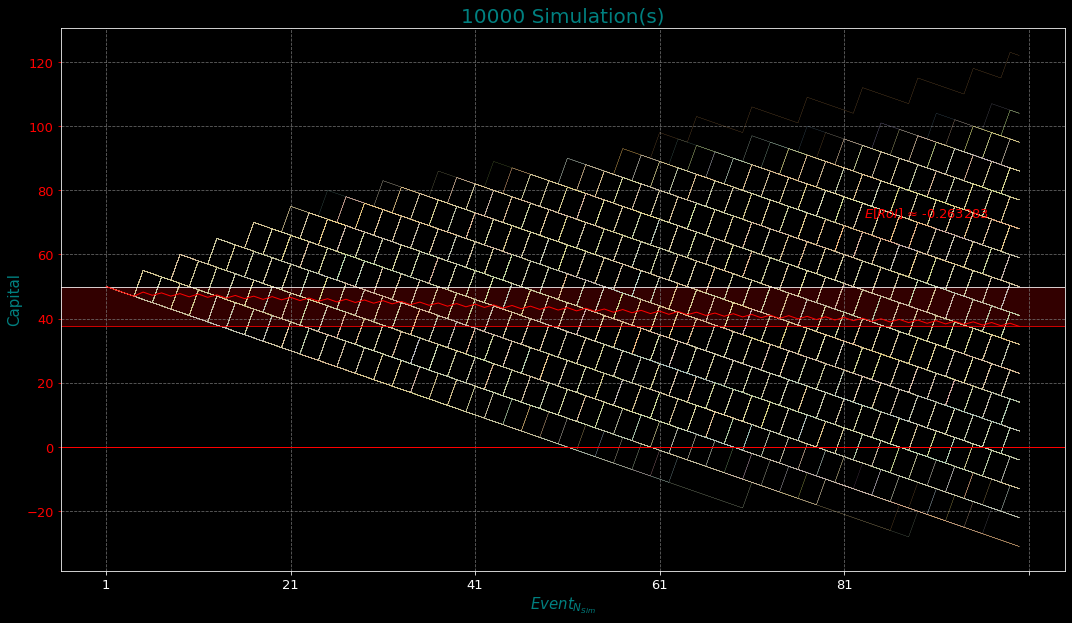

In [69]:
MC_plot(df1, E_V1, '$Event_{N_{Sim}}$', 'Capital')

Probabilities are illustrated  with its <i> Density Function (PDF)</i> $f(X)$ and the $\&$ <i>Accum. Distribution Function (CDF)</i> $F(X)$:

In [77]:
FV1 = df1.iloc[-1][df1.iloc[-1] > initial_capital]
FV1 = FV1.to_frame(name='$E[X]$: Event ' + str(n_games)).sort_values(by='$E[X]$: Event ' + str(n_games), ascending=False)
print(len(FV1), "ocurrences from", sim, "simulations: It lost money.")
d.Markdown(tabulate(FV1.head(10), headers = "keys", tablefmt = "pipe"))

1923 ocurrences from 10000 simulations: It lost money.


|   Sim |   $E[X]$: Event 100 |
|------:|--------------------:|
|   615 |                 122 |
|  1746 |                 104 |
|  1892 |                 104 |
|  4376 |                 104 |
|  8276 |                 104 |
|  8272 |                 104 |
|   909 |                  95 |
|  5368 |                  95 |
|   406 |                  95 |
|  5281 |                  95 |

$\therefore$ $Pr[X=x]$ to Win/Lose $\forall N = 10,000$ simulations is:

In [ ]:
FV = df1.iloc[-1][df1.iloc[-1] > initial_capital]
WL1 = pd.DataFrame([FV.count()/sim, 1-(FV.count()/sim)], index=['True', 'False'], columns=['$Pr(FV_{Value} > i_{Value})$'])
d.Markdown(tabulate(WL1, headers='keys', tablefmt='pipe'))

|       |   $Pr(FV_{Value} > i_{Value})$ |
|:------|-------------------------------:|
| True  |                         0.1951 |
| False |                         0.8049 |

In this regard, the probability $f(X)$, its cumulative values $F(X)$ $\&$ its $E[X] = \mu_{M.C}$ last event value is:

In [ ]:
unique, counts = np.unique(df1.iloc[-1], return_counts=True)
df1_FV=pd.DataFrame({'$FV_{Value}$': unique, 'frequency': counts}).set_index('$FV_{Value}$').sort_values(by='$FV_{Value}$', ascending=True)
df1_FV['$f(X)$'] = df1_FV['frequency']/sim
df1_FV['$F(X)$'] = df1_FV['frequency'].cumsum()/sim

d.Markdown(tabulate(df1_FV, headers='keys', tablefmt='pipe'))

|   $FV_{Value}$ |   frequency |   $f(X)$ |   $F(X)$ |
|---------------:|------------:|---------:|---------:|
|            -31 |           5 |   0.0005 |   0.0005 |
|            -22 |          16 |   0.0016 |   0.0021 |
|            -13 |          60 |   0.006  |   0.0081 |
|             -4 |         194 |   0.0194 |   0.0275 |
|              5 |         462 |   0.0462 |   0.0737 |
|             14 |         850 |   0.085  |   0.1587 |
|             23 |        1380 |   0.138  |   0.2967 |
|             32 |        1767 |   0.1767 |   0.4734 |
|             41 |        1881 |   0.1881 |   0.6615 |
|             50 |        1434 |   0.1434 |   0.8049 |
|             59 |        1045 |   0.1045 |   0.9094 |
|             68 |         568 |   0.0568 |   0.9662 |
|             77 |         238 |   0.0238 |   0.99   |
|             86 |          70 |   0.007  |   0.997  |
|             95 |          23 |   0.0023 |   0.9993 |
|            104 |           6 |   0.0006 |   0.9999 |
|            122 |           1 |   0.0001 |   1      |

The $E[X] \approx \mu_{M.C}$ and the $Mo$ are:

In [78]:
FV_EV = pd.DataFrame([E_V1.iloc[-1][0], df1.iloc[-1].mode()[0]], index=['$\mu_{M.C}$', '$Mo$']).rename(columns={0: '$FV_{E(V)}$'}) #Mean and Mode values.
d.Markdown(tabulate(FV_EV, headers='keys', tablefmt='pipe'))

|             |   $FV_{E(V)}$ |
|:------------|--------------:|
| $\mu_{M.C}$ |       37.5764 |
| $Mo$        |       41      |

$\therefore$ The $Win_{Events}$ prob. in a $100$ games played are:

In [ ]:
#Winning events
unique, counts = np.unique((df1.diff()==8).sum(), return_counts=True)
df1_ntosses=pd.DataFrame({'$Win_{events}$': unique, 'frequency': counts}).set_index('$Win_{events}$').sort_values(by='$Win_{events}$', ascending=True)
#Density functions
df1_ntosses['$f(X)$'] = df1_ntosses['frequency']/sim
df1_ntosses['$F(X)$'] = df1_ntosses['frequency'].cumsum()/sim
#Dataframe LateX
d.Markdown(tabulate(df1_ntosses, headers='keys', tablefmt='pipe'))

|   $Win_{events}$ |   frequency |   $f(X)$ |   $F(X)$ |
|-----------------:|------------:|---------:|---------:|
|                2 |           5 |   0.0005 |   0.0005 |
|                3 |          16 |   0.0016 |   0.0021 |
|                4 |          60 |   0.006  |   0.0081 |
|                5 |         194 |   0.0194 |   0.0275 |
|                6 |         462 |   0.0462 |   0.0737 |
|                7 |         850 |   0.085  |   0.1587 |
|                8 |        1380 |   0.138  |   0.2967 |
|                9 |        1767 |   0.1767 |   0.4734 |
|               10 |        1881 |   0.1881 |   0.6615 |
|               11 |        1434 |   0.1434 |   0.8049 |
|               12 |        1045 |   0.1045 |   0.9094 |
|               13 |         568 |   0.0568 |   0.9662 |
|               14 |         238 |   0.0238 |   0.99   |
|               15 |          70 |   0.007  |   0.997  |
|               16 |          23 |   0.0023 |   0.9993 |
|               17 |           6 |   0.0006 |   0.9999 |
|               19 |           1 |   0.0001 |   1      |

While the $E(V) = \mu_{M.C}$ and the $Mo$ for the $Win_{Events}$ are:

In [ ]:
n_TossesEV = pd.DataFrame([(df1.diff()==8).sum().mean(),(df1.diff()==8).sum().mode()[0]], index=['$\mu_{M.C}$', '$Mo$']).rename(columns={0: '$Win_{Events_{E(V)}}$'}) #Mean and Mode values.
d.Markdown(tabulate(n_TossesEV, headers='keys', tablefmt='pipe'))

|             |   $Win_{Events_{E(V)}}$ |
|:------------|------------------------:|
| $\mu_{M.C}$ |                  9.6312 |
| $Mo$        |                 10      |

The histograms for the prob. density function $f(X)$ on the $Win_{Events}$ $\&$ $FV$ are illustrated:

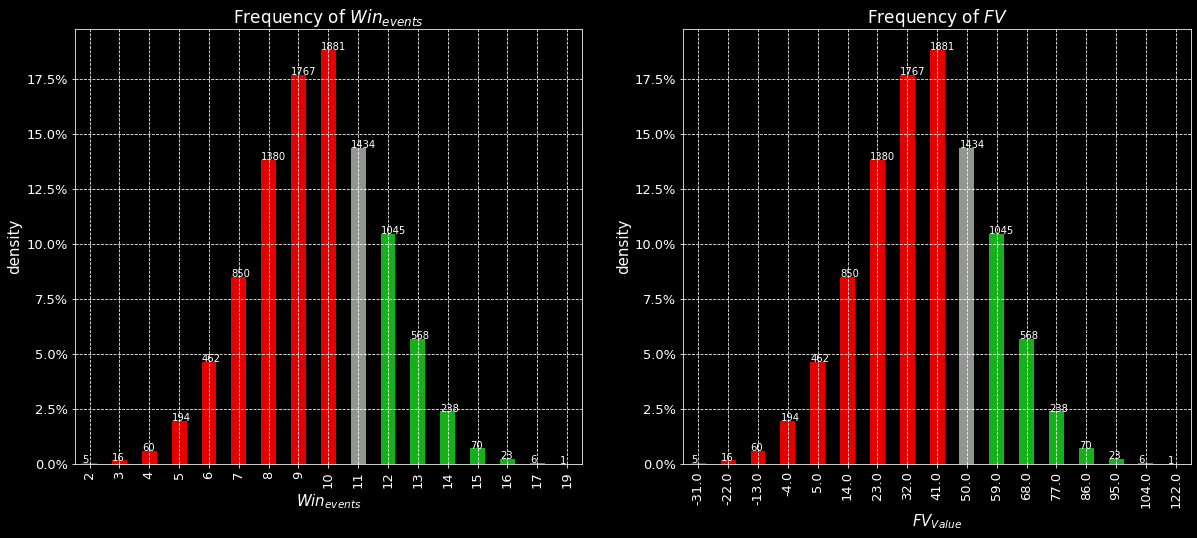

In [ ]:
vs.bar_plots(df1_ntosses.iloc[:, :1], df1_FV.iloc[:, :1], '$Win_{events}$', '$FV_{Value}$', 'Frequency of $Win_{events}$', 'Frequency of $FV$')